In [3]:

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

archivo = '/Users/alexandremartinez/Desktop/Datos_estacion.xls'

df = pd.read_excel(archivo)

df.head()


,Date (Europe/Madrid),Tempin (∞C),Temp (∞C),Chill (∞C),Dewin (∞C),Dew (∞C),Heatin (∞C),Heat (∞C),Humin (%),Hum (%),Wspdhi (m/s),Wspdavg (m/s),Wdiravg (∞),Bar (hPa),Rain (mm),Et (mm),Rainrate (mm/h),Solarrad (W/m≤),Uvi ()
0,2021-12-25 11:30:00,19.1,11.8,11.8,NaN,8.6,NaN,11.8,62.0,81.0,0.0,0.0,265.0,1013.2,0.3,NaN,0.0,112.9,1.0
1,2021-12-25 12:10:00,20.0,13.8,13.8,NaN,9.1,NaN,13.8,61.0,73.0,0.5,0.3,308.0,1012.8,0.8,NaN,0.0,160.6,1.0
2,2021-12-25 12:40:00,20.4,17.5,17.5,NaN,8.1,NaN,17.5,58.0,54.0,1.0,1.0,359.0,1012.3,0.8,NaN,0.0,389.0,3.0
3,2021-12-25 13:10:00,20.4,17.1,17.1,NaN,6.6,NaN,17.1,58.0,50.0,0.5,0.3,55.0,1011.8,0.8,NaN,0.0,303.3,2.0
4,2021-12-25 13:20:00,20.7,17.8,17.8,NaN,7.0,NaN,17.8,56.0,49.0,0.0,0.0,54.0,1011.7,0.8,NaN,0.0,206.3,2.0


In [ ]:
# dataset = pd.DataFrame()

dataset['temp'] = df['Temp (∞C)'].values
dataset['rocio'] = df['Dew (∞C)'].values
dataset['hum'] = df['Hum (%)'].values
dataset['press'] = df['Bar (hPa)'].values
dataset['rain'] = df['Rain (mm)'].values
dataset['rad'] = df['Solarrad (W/m≤)'].values

print('Antes:',len(dataset))
      
dataset = dataset.dropna()

print('Ahora:',len(dataset))
     
    
dataset.head()



In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = dataset.drop(['rain', 'temp'], axis=1)
y = dataset['temp']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(xtrain, ytrain)
model.score(xtest,ytest)


NameError: name 'dataset' is not defined

In [5]:
#prediccion

archivo_pred = '/Users/alexandremartinez/Downloads/pred.xls'

df_pred = pd.read_excel(archivo_pred)

df_pred.head()

dataset_pred = pd.DataFrame()

dataset_pred['temp'] = df_pred['Temp (∞C)'].values
dataset_pred['rocio'] = df_pred['Dew (∞C)'].values
dataset_pred['hum'] = df_pred['Hum (%)'].values
dataset_pred['press'] = df_pred['Bar (hPa)'].values
dataset_pred['rain'] = df_pred['Rain (mm)'].values
dataset_pred['rad'] = df_pred['Solarrad (W/m≤)'].values

print('Antes:',len(dataset_pred))
      
dataset_pred = dataset_pred.dropna()

print('Ahora:',len(dataset_pred))
     
    
dataset_pred.head()





Antes: 199
Ahora: 179


,temp,rocio,hum,press,rain,rad
0,26.1,22.4,80.0,1021.0,0.0,0.0
1,25.9,22.2,80.0,1021.0,0.0,0.0
2,26.0,22.3,80.0,1021.0,0.0,0.0
3,25.9,22.4,81.0,1020.9,0.0,0.0
4,25.8,22.5,82.0,1020.9,0.0,0.0


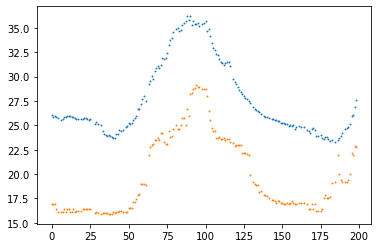

In [6]:
X_pred = dataset_pred.drop(['rain', 'temp'], axis=1)

plt.scatter(dataset_pred.index, dataset_pred['temp'], s=0.8)
plt.scatter( dataset_pred.index , model.predict(X_pred), s = 0.8)